In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy.random
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Fear model 1

![alt text](model1.png)

In [2]:
# model 1: local prevalence based
def fear1(beta,rb,beta_f, mu_f, mu,N,status,ite):

    # we need to consider multinomials for compartments that have more than 2 outcomes
    
    # S +I -> 2I
    # S+ I -> S+SF
    
    p_S=[]
    
    p_S.append(beta*float(status[ite,2])/N)## P(S-->I) 
    
    p_S.append(beta_f*float(status[ite,2])/N) # P(S ->SF)
    
    p_S.append(1.-p_S[0]-p_S[1]) # P(stay in S)
  

    out_S=np.random.multinomial(status[ite,1], p_S, size=1)
    
    delta_S_I=out_S[0][0]
    delta_S_SF=out_S[0][1]

    
    # SF +I -> 2I
    # SF+ S+R -> 2SF
    p_SF=[]
    
    p_SF.append(rb*beta*float(status[ite,2])/N)## P(SF-->I) 
    
    p_SF.append(mu_f*(float(status[ite,4])+float(status[ite,1]))/N) # P(SF ->S)
    
    p_SF.append(1.-p_SF[0]-p_SF[1]) # P(stay in SF)

    out_SF=np.random.multinomial(status[ite,3], p_SF, size=1)
    
    delta_SF_I=out_SF[0][0]
    delta_SF_S=out_SF[0][1]
    
    # Recovery of I
    
    p_2=mu                      ## P(I--->R)       

    delta_I_R=0.
    if status[ite,2]!=0:
        delta_I_R=binomial(status[ite,2],p_2)

    # update the compartments
    status[ite,1] = status[ite,1] - delta_S_I - delta_S_SF + delta_SF_S

    status[ite,2] = status[ite,2] + delta_S_I + delta_SF_I - delta_I_R
  
    status[ite,3] = status[ite,3] - delta_SF_I - delta_SF_S + delta_S_SF

    
    status[ite,4]+= delta_I_R # R is id=4
    
    return 0


def median(files):
    ite=len(files)
    out=[]
    if len(files)%2 ==0:

        median=[]
        median=files

        median=sorted(median)

        median.reverse()
        ee=int(float(ite)/2.)

        m_cinq=ee-1-int((ee-1)*0.5)
        max_cinq=ee +int((ee-1)*0.5)
        m_novc=ee-1-int((ee-1)*0.95)
        max_novc=ee +int((ee-1)*0.95)

        out.append([(median[ee]+median[ee-1])/2.,median[m_cinq],median[max_cinq],median[m_novc],median[max_novc]])

    else:

        median=[]
        median=files

        median=sorted(median)

        median.reverse()
        ee=int(float(ite)/2.+0.5)
        m_cinq=ee-1-int((ee-1)*0.5)
        max_cinq=ee-1+int((ee-1)*0.5)
        m_novc=ee-1-int((ee-1)*0.95)
        max_novc=ee-1+int((ee-1)*0.95)

        out.append([median[ee-1],median[m_cinq],median[max_cinq],median[m_novc],median[max_novc]])

    return out

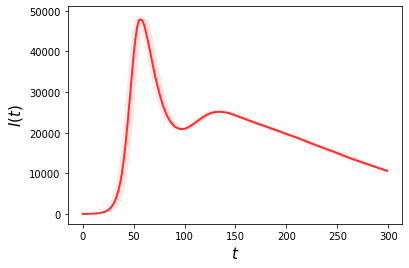

In [3]:
N=1000000. # Population size
t_max=300 # Number of time steps    
beta=0.3
beta_f=3.
rb=0.1
mu_f=0.1
mu=0.1
ite_max=100 # number of realizations

status=np.zeros((ite_max, 5),float) # initially all zero

# this is a dictionary where we can put all the values 
# for the median
value_per_time={}


for ite in range(ite_max):
    # initial conditions for each iteration
    
    status[ite,1]=N-10
    status[ite,2]=10
    

    for t in range(t_max):
        # let's call the function until t=tmax
        fear1(beta,rb,beta_f, mu_f, mu,N,status,ite)
        
        value_per_time.setdefault(t,[])
        value_per_time[t].append(status[ite,2])
    
it=[]
it_up=[]
it_down=[]
x=[]
for t in range(t_max):
    med=median(value_per_time[t])
    it.append(med[0][0]) # this is the median
    x.append(t)
    it_up.append(med[0][3]) # this is the 95% RR upper bound
    it_down.append(med[0][4]) # this is the 95% RR lower bound
    
        
plt.plot(it,linewidth=2, color='Red', alpha=0.8) #median
# we can plot the refrence range as shaded area
plt.fill_between(x,it_up, it_down, where=it_up >= it_down, facecolor="Red", interpolate=True,alpha=0.1)
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$I(t)$',fontsize=15)
plt.show()

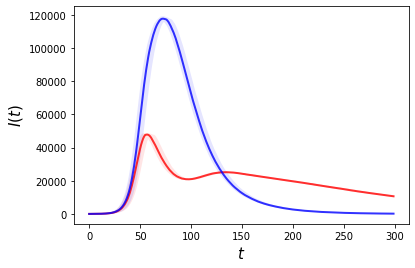

In [4]:
# what happens  if rb increases?

N=1000000. # Population size
t_max=300 # Number of time steps    
beta=0.3
beta_f=3.
rb=0.5
mu_f=0.1
mu=0.1
ite_max=100 # number of realizations

status=np.zeros((ite_max, 5),float) # initially all zero

# this is a dictionary where we can put all the values 
# for the median
value_per_time={}


for ite in range(ite_max):
    # initial conditions for each iteration
    
    status[ite,1]=N-10
    status[ite,2]=10
    

    for t in range(t_max):
        # let's call the function until t=tmax
        fear1(beta,rb,beta_f, mu_f, mu,N,status,ite)
        
        value_per_time.setdefault(t,[])
        value_per_time[t].append(status[ite,2])
    
it2=[]
it_up2=[]
it_down2=[]
x2=[]
for t in range(t_max):
    med=median(value_per_time[t])
    it2.append(med[0][0]) # this is the median
    x2.append(t)
    it_up2.append(med[0][3]) # this is the 95% RR upper bound
    it_down2.append(med[0][4]) # this is the 95% RR lower bound
    
        
plt.plot(it,linewidth=2, color='Red', alpha=0.8) #median
# we can plot the refrence range as shaded area
plt.fill_between(x,it_up, it_down, where=it_up >= it_down, facecolor="Red", interpolate=True,alpha=0.1)
plt.plot(it2,linewidth=2, color='Blue', alpha=0.8) #median
# we can plot the refrence range as shaded area
plt.fill_between(x2,it_up2, it_down2, where=it_up2 >= it_down2, facecolor="Blue", interpolate=True,alpha=0.1)
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$I(t)$',fontsize=15)
plt.show()

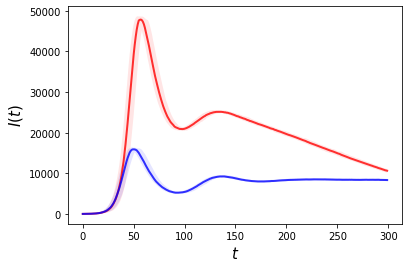

In [5]:
# what happens  if we increase beta_f?

N=1000000. # Population size
t_max=300 # Number of time steps    
beta=0.3
beta_f=10.
rb=0.1
mu_f=0.1
mu=0.1
ite_max=100 # number of realizations

status=np.zeros((ite_max, 5),float) # initially all zero

# this is a dictionary where we can put all the values 
# for the median
value_per_time={}


for ite in range(ite_max):
    # initial conditions for each iteration
    
    status[ite,1]=N-10
    status[ite,2]=10
    

    for t in range(t_max):
        # let's call the function until t=tmax
        fear1(beta,rb,beta_f, mu_f, mu,N,status,ite)
        
        value_per_time.setdefault(t,[])
        value_per_time[t].append(status[ite,2])
    
it2=[]
it_up2=[]
it_down2=[]
x2=[]
for t in range(t_max):
    med=median(value_per_time[t])
    it2.append(med[0][0]) # this is the median
    x2.append(t)
    it_up2.append(med[0][3]) # this is the 95% RR upper bound
    it_down2.append(med[0][4]) # this is the 95% RR lower bound
    
        
plt.plot(it,linewidth=2, color='Red', alpha=0.8) #median
# we can plot the refrence range as shaded area
plt.fill_between(x,it_up, it_down, where=it_up >= it_down, facecolor="Red", interpolate=True,alpha=0.1)
plt.plot(it2,linewidth=2, color='Blue', alpha=0.8) #median
# we can plot the refrence range as shaded area
plt.fill_between(x2,it_up2, it_down2, where=it_up2 >= it_down2, facecolor="Blue", interpolate=True,alpha=0.1)
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$I(t)$',fontsize=15)
plt.show()

## Fear model 3
![alt text](model3.png)

In [6]:
# model 3: local belief based
def fear3(beta,rb,beta_f, mu_f, mu, alpha,N,status,ite):

    # we need to consider multinomials for compartments that have more than 2 outcomes
    
    # S +I -> 2I
    # S+ I -> S+SF
    # S+ SF -> 2SF
    
    p_S=[]
    
    p_S.append(beta*float(status[ite,2])/N)## P(S-->I) 
    
    p_S.append(beta_f*float(status[ite,2])/N) # P(S ->SF)
    
    p_S.append(alpha*beta_f*float(status[ite,3])/N) # P(S ->SF)
    
    p_S.append(1.-p_S[0]-p_S[1]-p_S[2]) # P(stay in S)
  

    out_S=np.random.multinomial(status[ite,1], p_S, size=1)
    
    delta_S_I=out_S[0][0]
    delta_S_SF=out_S[0][1]+out_S[0][2]

    
    # SF +I -> 2I
    # SF+ S+R -> 2SF
    p_SF=[]
    
    p_SF.append(rb*beta*float(status[ite,2])/N)## P(SF-->I) 
    
    p_SF.append(mu_f*(float(status[ite,4])+float(status[ite,1]))/N) # P(SF ->S)
    
    p_SF.append(1.-p_SF[0]-p_SF[1]) # P(stay in SF)

    out_SF=np.random.multinomial(status[ite,3], p_SF, size=1)
    
    delta_SF_I=out_SF[0][0]
    delta_SF_S=out_SF[0][1]
    
    # Recovery of I
    
    p_2=mu                      ## P(I--->R)       

    delta_I_R=0.
    if status[ite,2]!=0:
        delta_I_R=binomial(status[ite,2],p_2)

    # update the compartments
    status[ite,1] = status[ite,1] - delta_S_I - delta_S_SF + delta_SF_S

    status[ite,2] = status[ite,2] + delta_S_I + delta_SF_I - delta_I_R
  
    status[ite,3] = status[ite,3] - delta_SF_I - delta_SF_S + delta_S_SF

    
    status[ite,4]+= delta_I_R # R is id=4
    
    return 0

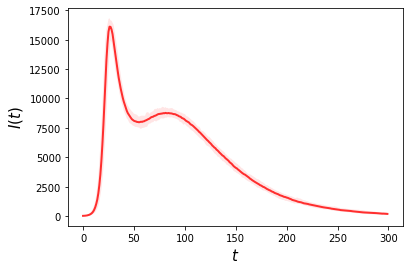

In [7]:
N=1000000. # Population size
t_max=300 # Number of time steps    
beta=0.8
beta_f=12.
rb=0.42
mu_f=0.5
mu=0.4
alpha=0.05
ite_max=100 # number of realizations

status=np.zeros((ite_max, 5),float) # initially all zero

# this is a dictionary where we can put all the values 
# for the median
value_per_time={}


for ite in range(ite_max):
    # initial conditions for each iteration
    
    status[ite,1]=N-10
    status[ite,2]=10
    

    for t in range(t_max):
        # let's call the function until t=tmax
        fear3(beta,rb,beta_f, mu_f, mu,alpha,N,status,ite)
        
        value_per_time.setdefault(t,[])
        value_per_time[t].append(status[ite,2])
    
it=[]
it_up=[]
it_down=[]
x=[]
for t in range(t_max):
    med=median(value_per_time[t])
    it.append(med[0][0]) # this is the median
    x.append(t)
    it_up.append(med[0][3]) # this is the 95% RR upper bound
    it_down.append(med[0][4]) # this is the 95% RR lower bound
    
        
plt.plot(it,linewidth=2, color='Red', alpha=0.8) #median
# we can plot the refrence range as shaded area
plt.fill_between(x,it_up, it_down, where=it_up >= it_down, facecolor="Red", interpolate=True,alpha=0.1)
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$I(t)$',fontsize=15)
plt.show()

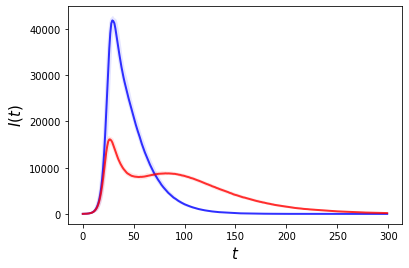

In [8]:
# what if alpha=0? So, model 1

N=1000000. # Population size
t_max=300 # Number of time steps    
beta=0.8
beta_f=12.
rb=0.42
mu_f=0.5
mu=0.4
alpha=0.
ite_max=100 # number of realizations

status=np.zeros((ite_max, 5),float) # initially all zero

# this is a dictionary where we can put all the values 
# for the median
value_per_time={}


for ite in range(ite_max):
    # initial conditions for each iteration
    
    status[ite,1]=N-10
    status[ite,2]=10
    

    for t in range(t_max):
        # let's call the function until t=tmax
        fear3(beta,rb,beta_f, mu_f, mu,alpha,N,status,ite)
        
        value_per_time.setdefault(t,[])
        value_per_time[t].append(status[ite,2])
    
it2=[]
it_up2=[]
it_down2=[]
x2=[]
for t in range(t_max):
    med=median(value_per_time[t])
    it2.append(med[0][0]) # this is the median
    x2.append(t)
    it_up2.append(med[0][3]) # this is the 95% RR upper bound
    it_down2.append(med[0][4]) # this is the 95% RR lower bound
    
plt.plot(it2,linewidth=2, color='Blue', alpha=0.8) #median
# we can plot the refrence range as shaded area
plt.fill_between(x2,it_up2, it_down2, where=it_up2 >= it_down2, facecolor="Blue", interpolate=True,alpha=0.1)
plt.plot(it,linewidth=2, color='Red', alpha=0.8) #median
# we can plot the refrence range as shaded area
plt.fill_between(x,it_up, it_down, where=it_up >= it_down, facecolor="Red", interpolate=True,alpha=0.1)
plt.xlabel('$t$',fontsize=15)
plt.ylabel('$I(t)$',fontsize=15)
plt.show()

## Behavioral changes in time-varying networks

In [9]:
def SIR_net(N,G,lambd,mu,status):
    # we make the process syncronous
    # at each time step all infected indivuals can infect their peers
    # status is a vector that takes two values for each node
    # 0 -> S
    # 1 -> I
    temp_inf=set()
    temp_rec=set()
    for i in G.nodes():
        # if the node is infected
        if status[i]==1:
            # we go through her neighbors and we try to infect the S
            for j in G.neighbors(i):
                if status[j]==0 and uniform(0,1)<lambd:
                    temp_inf.add(j) # this node will be infected next
            
    # note that we changed the function a bit respect to before. Note the new loop in N
    # why is that?!
    for i in range(N):
        if status[i]==1:
            if uniform(0,1)<mu:
                temp_rec.add(i)
                
    # update the status
    for i in temp_inf:
        status[i]=1  
    for i in temp_rec:
        status[i]=2
        
def set_seeds(status,p):
    # we get the number of infected given a fraction p
    n_of_infected=int(p*status.size)
    # we get the list of nodes and shuffle it
    list_nodes=[]
    for i in range(status.size):
        list_nodes.append(i)
    shuffle(list_nodes)
    
    # the first n_of_infected will be the seeds
    for i in range(n_of_infected):
        status[list_nodes[i]]=1
        
def power_law_dist(eps,alpha):
    return ((1.-eps**(alpha+1.))*uniform(0,1)+eps**(alpha+1))**(1./(alpha+1.))

def activity_driven_net(activity,m):
    G=nx.Graph()
    act=[]
    # active nodes
    N=len(activity)
    for i in range(N):
        if uniform(0,1)<activity[i]:
            act.append(i)
    # let us create the network
    for i in act:
        c=0
        G.add_node(i)
        while c<m:
            target=randint(N)
            if target!=i and target not in G.neighbors(i):
                G.add_edge(i,target)
                c+=1
    return G

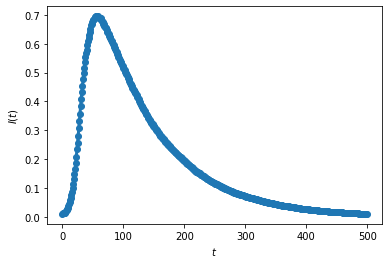

In [10]:
N=10000
eps=1e-2
alpha=-2.1
m=2
mu=0.01
p=0.01 # initial seeds
t_max=500
f=0.1*N # fraction of population to reach
    
x=[]
y=[]
lambd=0.8 # let's get some values of lambd


activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)




status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

set_seeds(status,p)
c=0
t=0
for t in range(t_max): # we run until there are infected!
    G=activity_driven_net(activity,m)
    SIR_net(N,G,lambd,mu,status)
    
    x.append(t) # disease prevalence 
    inf=0.
    for j in range(N):
        if status[j]==1:
            inf+=1
    y.append(inf/N)


plt.plot(x,y,lw=3,marker='o')

plt.xlabel('$t$')
plt.ylabel('$I(t)$')
plt.show()

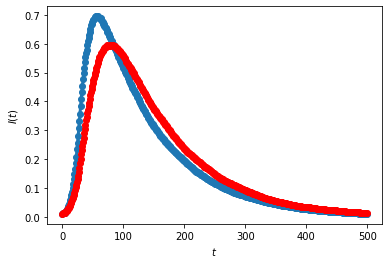

In [11]:
# let's start implementing some behavioral changes
# as first thing let's see what happens if the infected individuals reduce their activity as soon as
# they get infected

N=10000
eps=1e-2
alpha=-2.1  
m=2
mu=0.01
p=0.01 # initial seeds
t_max=500
r=0.5 # reduction of the activity of infected individuals
f=0.1*N # fraction of population to reach
    

lambd=0.8 # let's get some values of lambd


activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)



status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

set_seeds(status,p)
c=0
t=0
x1=[]
y1=[]
for t in range(t_max): # we run until there are infected!
    
    activity_t={}
    for j in range(N):
        if status[j]==1:
            activity_t[j]=r*activity[j]
        else:
            activity_t[j]=activity[j]

    G=activity_driven_net(activity_t,m)
    SIR_net(N,G,lambd,mu,status)
    
    x1.append(t)
    inf=0.
    for j in range(N):
        if status[j]==1:
            inf+=1
    y1.append(inf/N)


plt.plot(x,y,lw=3,marker='o')
plt.plot(x1,y1,lw=3,marker='o',color='Red')

plt.xlabel('$t$')
plt.ylabel('$I(t)$')
plt.show()

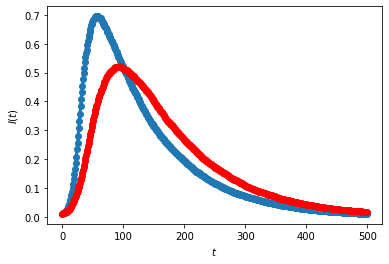

In [12]:
# what if we reduce r more?
N=10000
eps=1e-2
alpha=-2.1 
m=2
mu=0.01
p=0.01 # initial seeds
t_max=500
r=0.3 # reduction of the activity of infected individuals
f=0.1*N # fraction of population to reach
    

lambd=0.8 # let's get some values of lambd


activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)



status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

set_seeds(status,p)
c=0
t=0
x1=[]
y1=[]
for t in range(t_max): # we run until there are infected!
    
    activity_t={}
    for j in range(N):
        if status[j]==1:
            activity_t[j]=r*activity[j]
        else:
            activity_t[j]=activity[j]

    G=activity_driven_net(activity_t,m)
    SIR_net(N,G,lambd,mu,status)
    
    x1.append(t)
    inf=0.
    for j in range(N):
        if status[j]==1:
            inf+=1
    y1.append(inf/N)




plt.plot(x,y,lw=3,marker='o')
plt.plot(x1,y1,lw=3,marker='o',color='Red')

plt.xlabel('$t$')
plt.ylabel('$I(t)$')
plt.show()

In [ ]:
# what if the reduction of activity takes place when the number of infected surpasses a threshold?
N=10000
eps=1e-2
alpha=-2.1 
m=2
mu=0.01
p=0.01 # initial seeds
t_max=500
threshold=4000 # threshold of number of cases
r=0.5
f=0.1*N # fraction of population to reach
    

lambd=0.8 # let's get some values of lambd


activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)



status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

set_seeds(status,p)
c=0
t=0
x1=[]
y1=[]
check=0
for t in range(t_max): # we run until there are infected!
    
    if check==0: # normal behavior
        G=activity_driven_net(activity,m)
        
    if check==1: # change of behavior
        G=activity_driven_net(activity_t,m)
        
    SIR_net(N,G,lambd,mu,status)
    
    x1.append(t)
    inf=0.
    for j in range(N):
        if status[j]==1:
            inf+=1
    y1.append(inf/N)
    
    # if the number of cases is above the threshold the activity changes
    if inf>=threshold and check==0:
            activity_t={}
            for j in range(N):
                activity_t[j]=r*activity[j]
            check=1
    # if it goes back to the threshold behaviors goes back to normal
    if inf<=threshold:
            check=0


plt.plot(x,y,lw=3,marker='o')
plt.plot(x1,y1,lw=3,marker='o',color='Red')

plt.xlabel('$t$')
plt.ylabel('$I(t)$')
plt.show()

In [ ]:
# what if the threshold is lower
N=10000
eps=1e-2
alpha=-2.1  
m=2
mu=0.01
p=0.01 # initial seeds
t_max=500
threshold=1000 # threshold of number of cases
r=0.5
f=0.1*N # fraction of population to reach
    

lambd=0.8 # let's get some values of lambd


activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)



status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

set_seeds(status,p)
c=0
t=0
x1=[]
y1=[]
check=0
for t in range(t_max): # we run until there are infected!
    
    if check==0: # normal behavior
        G=activity_driven_net(activity,m)
        
    if check==1: # change of behavior
        G=activity_driven_net(activity_t,m)
        
    SIR_net(N,G,lambd,mu,status)
    
    x1.append(t)
    inf=0.
    for j in range(N):
        if status[j]==1:
            inf+=1
    y1.append(inf/N)
    
    if inf>=threshold and check==0:
            activity_t={}
            for j in range(N):
                activity_t[j]=r*activity[j]
            check=1
    
    if inf<=threshold:
            check=0


plt.plot(x,y,lw=3,marker='o')
plt.plot(x1,y1,lw=3,marker='o',color='Red')

plt.xlabel('$t$')
plt.ylabel('$I(t)$')
plt.show()

In [ ]:
# what if the threshold is reduction is stronger
N=10000
eps=1e-2
alpha=-2.1
m=2
mu=0.01
p=0.01 # initial seeds
t_max=500
threshold=1000 # threshold of number of cases
r=0.2
f=0.1*N # fraction of population to reach
    

lambd=0.8 # let's get some values of lambd


activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)



status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

set_seeds(status,p)
c=0
t=0
x1=[]
y1=[]
check=0
for t in range(t_max): # we run until there are infected!
    
    if check==0: # normal behavior
        G=activity_driven_net(activity,m)
        
    if check==1: # change of behavior
        G=activity_driven_net(activity_t,m)
        
    SIR_net(N,G,lambd,mu,status)
    
    x1.append(t)
    inf=0.
    for j in range(N):
        if status[j]==1:
            inf+=1
    y1.append(inf/N)
    
    if inf>=threshold and check==0:
            activity_t={}
            for j in range(N):
                activity_t[j]=r*activity[j]
            check=1
    
    if inf<=threshold:
            check=0


plt.plot(x,y,lw=3,marker='o')
plt.plot(x1,y1,lw=3,marker='o',color='Red')

plt.xlabel('$t$')
plt.ylabel('$I(t)$')
plt.show()

In [ ]:
# what if the threshold is reduction is stronger
N=10000
eps=1e-2
alpha=-2.1
m=2
mu=0.01
p=0.01 # initial seeds
t_max=500
threshold=500 # threshold of number of cases
r=0.1
f=0.1*N # fraction of population to reach
    

lambd=0.8 # let's get some values of lambd


activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)



status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

set_seeds(status,p)
c=0
t=0
x1=[]
y1=[]
check=0
for t in range(t_max): # we run until there are infected!
    
    if check==0: # normal behavior
        G=activity_driven_net(activity,m)
        
    if check==1: # change of behavior
        G=activity_driven_net(activity_t,m)
        
    SIR_net(N,G,lambd,mu,status)
    
    x1.append(t)
    inf=0.
    for j in range(N):
        if status[j]==1:
            inf+=1
    y1.append(inf/N)
    
    if inf>=threshold and check==0:
            activity_t={}
            for j in range(N):
                activity_t[j]=r*activity[j]
            check=1
    
    if inf<=threshold:
            check=0


plt.plot(x,y,lw=3,marker='o')
plt.plot(x1,y1,lw=3,marker='o',color='Red')

plt.xlabel('$t$')
plt.ylabel('$I(t)$')
plt.show()

In [ ]:
# what is the effect on the number of people affected by the disease?
# this is the baseline

N=10000
eps=1e-2
alpha=-2.1 
m=2
mu=0.01
p=0.01 # initial seeds
t_max=500
f=0.1*N # fraction of population to reach
    
x=[]
y=[]
lambd=0.8 # let's get some values of lambd


activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)




status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

set_seeds(status,p)
c=0
t=0
for t in range(t_max): # we run until there are infected!
    G=activity_driven_net(activity,m)
    SIR_net(N,G,lambd,mu,status)
    
    x.append(t)
    inf=0.
    for j in range(N):
        if status[j]==2:
            inf+=1
    y.append(inf/N)


plt.plot(x,y,lw=3,marker='o')

plt.xlabel('$t$')
plt.ylabel('$R(t)$')
plt.show()

In [ ]:
N=10000
eps=1e-2
alpha=-2.1 
m=2
mu=0.01
p=0.01 # initial seeds
t_max=500
threshold=4000 # threshold of number of cases
r=0.5
f=0.1*N # fraction of population to reach
    

lambd=0.8 # let's get some values of lambd


activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)



status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

set_seeds(status,p)
c=0
t=0
x1=[]
y1=[]
check=0
for t in range(t_max): # we run until there are infected!
    
    if check==0: # normal behavior
        G=activity_driven_net(activity,m)
        
    if check==1: # change of behavior
        G=activity_driven_net(activity_t,m)
        
    SIR_net(N,G,lambd,mu,status)
    
    x1.append(t)
    inf=0.
    for j in range(N):
        if status[j]==2:
            inf+=1
    y1.append(inf/N)
    
    # if the number of cases is above the threshold the activity changes
    if inf>=threshold and check==0:
            activity_t={}
            for j in range(N):
                activity_t[j]=r*activity[j]
            check=1
    # if it goes back to the threshold behaviors goes back to normal
    if inf<=threshold:
            check=0


plt.plot(x,y,lw=3,marker='o')
plt.plot(x1,y1,lw=3,marker='o',color='Red')

plt.xlabel('$t$')
plt.ylabel('$R(t)$')
plt.show()

In [ ]:
# what if the reduction of activity takes place when the number of infected surpasses a threshold?
N=10000
eps=1e-2
alpha=-2.1
m=2
mu=0.01
p=0.01 # initial seeds
t_max=500
threshold=1000 # threshold of number of cases
r=0.5
f=0.1*N # fraction of population to reach
    

lambd=0.8 # let's get some values of lambd


activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)



status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

set_seeds(status,p)
c=0
t=0
x1=[]
y1=[]
check=0
for t in range(t_max): # we run until there are infected!
    
    if check==0: # normal behavior
        G=activity_driven_net(activity,m)
        
    if check==1: # change of behavior
        G=activity_driven_net(activity_t,m)
        
    SIR_net(N,G,lambd,mu,status)
    
    x1.append(t)
    inf=0.
    for j in range(N):
        if status[j]==2:
            inf+=1
    y1.append(inf/N)
    
    # if the number of cases is above the threshold the activity changes
    if inf>=threshold and check==0:
            activity_t={}
            for j in range(N):
                activity_t[j]=r*activity[j]
            check=1
    # if it goes back to the threshold behaviors goes back to normal
    if inf<=threshold:
            check=0


plt.plot(x,y,lw=3,marker='o')
plt.plot(x1,y1,lw=3,marker='o',color='Red')

plt.xlabel('$t$')
plt.ylabel('$R(t)$')
plt.show()

In [ ]:
# what if the reduction of activity takes place when the number of infected surpasses a threshold?
N=10000
eps=1e-2
alpha=-2.1 
m=2
mu=0.01
p=0.01 # initial seeds
t_max=500
threshold=1000 # threshold of number of cases
r=0.1
f=0.1*N # fraction of population to reach
    

lambd=0.8 # let's get some values of lambd


activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)



status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

set_seeds(status,p)
c=0
t=0
x1=[]
y1=[]
check=0
for t in range(t_max): # we run until there are infected!
    
    if check==0: # normal behavior
        G=activity_driven_net(activity,m)
        
    if check==1: # change of behavior
        G=activity_driven_net(activity_t,m)
        
    SIR_net(N,G,lambd,mu,status)
    
    x1.append(t)
    inf=0.
    for j in range(N):
        if status[j]==2:
            inf+=1
    y1.append(inf/N)
    
    # if the number of cases is above the threshold the activity changes
    if inf>=threshold and check==0:
            activity_t={}
            for j in range(N):
                activity_t[j]=r*activity[j]
            check=1
    # if it goes back to the threshold behaviors goes back to normal
    if inf<=threshold:
            check=0


plt.plot(x,y,lw=3,marker='o')
plt.plot(x1,y1,lw=3,marker='o',color='Red')

plt.xlabel('$t$')
plt.ylabel('$R(t)$')
plt.show()

In [ ]:
# what if the reduction of activity takes place when the number of infected surpasses a threshold?
N=10000
eps=1e-2
alpha=-2.1 
m=2
mu=0.01
p=0.01 # initial seeds
t_max=500
threshold=1000 # threshold of number of cases
r=0.1
f=0.1*N # fraction of population to reach
    

lambd=0.8 # let's get some values of lambd


activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)



status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

set_seeds(status,p)
c=0
t=0
x1=[]
y1=[]
check=0
for t in range(t_max): # we run until there are infected!
    
    if check==0: # normal behavior
        G=activity_driven_net(activity,m)
        
    if check==1: # change of behavior
        G=activity_driven_net(activity_t,m)
        
    SIR_net(N,G,lambd,mu,status)
    
    x1.append(t)
    inf=0.
    for j in range(N):
        if status[j]==2:
            inf+=1
    y1.append(inf/N)
    
    # if the number of cases is above the threshold the activity changes
    if inf>=threshold and check==0:
            activity_t={}
            for j in range(N):
                activity_t[j]=r*activity[j]
            check=1
    # if it goes back to the threshold behaviors goes back to normal
    if inf<=threshold:
            check=0


plt.plot(x,y,lw=3,marker='o')
plt.plot(x1,y1,lw=3,marker='o',color='Red')

plt.xlabel('$t$')
plt.ylabel('$R(t)$')
plt.show()

In [ ]:
# what if the reduction of activity takes place when the number of infected surpasses a threshold?
N=10000
eps=1e-2
alpha=-2.1
m=2
mu=0.01
p=0.01 # initial seeds
t_max=500
threshold=1000 # threshold of number of cases
r=0.01
f=0.1*N # fraction of population to reach
    

lambd=0.8 # let's get some values of lambd


activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)



status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

set_seeds(status,p)
c=0
t=0
x1=[]
y1=[]
check=0
for t in range(t_max): # we run until there are infected!
    
    if check==0: # normal behavior
        G=activity_driven_net(activity,m)
        
    if check==1: # change of behavior
        G=activity_driven_net(activity_t,m)
        
    SIR_net(N,G,lambd,mu,status)
    
    x1.append(t)
    inf=0.
    for j in range(N):
        if status[j]==2:
            inf+=1
    y1.append(inf/N)
    
    # if the number of cases is above the threshold the activity changes
    if inf>=threshold and check==0:
            activity_t={}
            for j in range(N):
                activity_t[j]=r*activity[j]
            check=1
    # if it goes back to the threshold behaviors goes back to normal
    if inf<=threshold:
            check=0


plt.plot(x,y,lw=3,marker='o')
plt.plot(x1,y1,lw=3,marker='o',color='Red')

plt.xlabel('$t$')
plt.ylabel('$R(t)$')
plt.show()

In [ ]:
N=10000
eps=1e-2
alpha=-2.1
m=2
mu=0.01
p=0.01 # initial seeds
t_max=500
threshold=200 # threshold of number of cases
r=0.1
f=0.1*N # fraction of population to reach
    

lambd=0.8 # let's get some values of lambd


activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)



status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

set_seeds(status,p)
c=0
t=0
x1=[]
y1=[]
check=0
for t in range(t_max): # we run until there are infected!
    
    if check==0: # normal behavior
        G=activity_driven_net(activity,m)
        
    if check==1: # change of behavior
        G=activity_driven_net(activity_t,m)
        
    SIR_net(N,G,lambd,mu,status)
    
    x1.append(t)
    inf=0.
    for j in range(N):
        if status[j]==2:
            inf+=1
    y1.append(inf/N)
    
    # if the number of cases is above the threshold the activity changes
    if inf>=threshold and check==0:
            activity_t={}
            for j in range(N):
                activity_t[j]=r*activity[j]
            check=1
    # if it goes back to the threshold behaviors goes back to normal
    if inf<=threshold:
            check=0


plt.plot(x,y,lw=3,marker='o')
plt.plot(x1,y1,lw=3,marker='o',color='Red')

plt.xlabel('$t$')
plt.ylabel('$R(t)$')
plt.show()

In [ ]:
# what if only a fraction b actually changes behavior? These are those that comply to the measaure
N=10000
eps=1e-2
alpha=-2.1
m=2
mu=0.01
p=0.01 # initial seeds
t_max=500
threshold=200 # threshold of number of cases
r=0.1
f=0.1*N # fraction of population to reach
b=0.7 # fraction of nodes that comply
    

lambd=0.8 # let's get some values of lambd


activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)



status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

set_seeds(status,p)
c=0
t=0
x=[]
y=[]
check=0
for t in range(t_max): # we run until there are infected!
    
    if check==0: # normal behavior
        G=activity_driven_net(activity,m)
        
    if check==1: # change of behavior
        G=activity_driven_net(activity_t,m)
        
    SIR_net(N,G,lambd,mu,status)
    
    x.append(t)
    inf=0.
    for j in range(N):
        if status[j]==1:
            inf+=1
    y.append(inf/N)
    
    # if the number of cases is above the threshold the activity changes
    if inf>=threshold and check==0:
            activity_t={}
            for j in range(N):
                if random.uniform(0,1)<b:
                    activity_t[j]=r*activity[j]
                else:
                    activity_t[j]=activity[j]
            check=1
    # if it goes back to the threshold behaviors goes back to normal
    if inf<=threshold:
            check=0


plt.plot(x,y,lw=3,marker='o')

plt.xlabel('$t$')
plt.ylabel('$i(t)$')
plt.show()

In [ ]:
# larger fraction of compliance
N=10000
eps=1e-2
alpha=-2.1 
m=2
mu=0.01
p=0.01 # initial seeds
t_max=500
threshold=200 # threshold of number of cases
r=0.1
f=0.1*N # fraction of population to reach
b=0.9 # fraction of nodes that comply
    

lambd=0.8 # let's get some values of lambd


activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)



status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

set_seeds(status,p)
c=0
t=0
x1=[]
y1=[]
check=0
for t in range(t_max): # we run until there are infected!
    
    if check==0: # normal behavior
        G=activity_driven_net(activity,m)
        
    if check==1: # change of behavior
        G=activity_driven_net(activity_t,m)
        
    SIR_net(N,G,lambd,mu,status)
    
    x1.append(t)
    inf=0.
    for j in range(N):
        if status[j]==1:
            inf+=1
    y1.append(inf/N)
    
    # if the number of cases is above the threshold the activity changes
    if inf>=threshold and check==0:
            activity_t={}
            for j in range(N):
                if random.uniform(0,1)<b:
                    activity_t[j]=r*activity[j]
                else:
                    activity_t[j]=activity[j]
            check=1
    # if it goes back to the threshold behaviors goes back to normal
    if inf<=threshold:
            check=0


plt.plot(x,y,lw=3,marker='o')
plt.plot(x1,y1,lw=3,marker='o',color='Red')

plt.xlabel('$t$')
plt.ylabel('$i(t)$')
plt.show()

In [ ]:
# what if this fraction is selected according to the activity?
def get_fraction_b(activity,type_ordering,b):
    # lets get first the list of activities for each node
    lista=[]
    for j in activity:
        lista.append([activity[j],j])
    # according to the type of sorting method we select the first b*N
    if type_ordering=='ascending':
        lista=sorted(lista)  # from the bottom to the top of activity
    if type_ordering=='descending':
        lista=sorted(lista,reverse=True)  # from the top to the bottom of activity
        
        
    compliance_number=int(b*len(activity))  # this the number of people that comply
    compliance_vector={}
    for j in range(len(lista)):
        id1=lista[j][1]
        if j<compliance_number:
            compliance_vector[id1]=1  # means this node complies
        else:
            compliance_vector[id1]=0  # means this node does not comply so does not change behavior
    return compliance_vector    

In [ ]:
N=10000
eps=1e-2
alpha=-2.1
m=2
mu=0.01
p=0.01 # initial seeds
t_max=500
threshold=200 # threshold of number of cases
r=0.1
f=0.1*N # fraction of population to reach
b=0.7 # fraction of nodes that comply
    

lambd=0.8 # let's get some values of lambd


activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)

# pick the people that will comply
compliance_vector=get_fraction_b(activity,'ascending',b)

status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

set_seeds(status,p)
c=0
t=0
x1=[]
y1=[]
check=0
for t in range(t_max): # we run until there are infected!
    
    if check==0: # normal behavior
        G=activity_driven_net(activity,m)
        
    if check==1: # change of behavior
        G=activity_driven_net(activity_t,m)
        
    SIR_net(N,G,lambd,mu,status)
    
    x1.append(t)
    inf=0.
    for j in range(N):
        if status[j]==1:
            inf+=1
    y1.append(inf/N)
    
    # if the number of cases is above the threshold the activity changes
    if inf>=threshold and check==0:
            activity_t={}
            for j in range(N):
                if compliance_vector[j]==1:
                    activity_t[j]=r*activity[j]
                else:
                    activity_t[j]=activity[j]
            check=1
    # if it goes back to the threshold behaviors goes back to normal
    if inf<=threshold:
            check=0


plt.plot(x,y,lw=3,marker='o')
plt.plot(x1,y1,lw=3,marker='o',color='Red')

plt.xlabel('$t$')
plt.ylabel('$i(t)$')
plt.show()

In [ ]:
# lets select them in reverse order: from the most active down
N=10000
eps=1e-2
alpha=-2.1
m=2
mu=0.01
p=0.01 # initial seeds
t_max=500
threshold=200 # threshold of number of cases
r=0.1
f=0.1*N # fraction of population to reach
b=0.7 # fraction of nodes that comply
    

lambd=0.8 # let's get some values of lambd


activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)

# pick the people that will comply
compliance_vector=get_fraction_b(activity,'descending',b)

status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

set_seeds(status,p)
c=0
t=0
x1=[]
y1=[]
check=0
for t in range(t_max): # we run until there are infected!
    
    if check==0: # normal behavior
        G=activity_driven_net(activity,m)
        
    if check==1: # change of behavior
        G=activity_driven_net(activity_t,m)
        
    SIR_net(N,G,lambd,mu,status)
    
    x1.append(t)
    inf=0.
    for j in range(N):
        if status[j]==1:
            inf+=1
    y1.append(inf/N)
    
    # if the number of cases is above the threshold the activity changes
    if inf>=threshold and check==0:
            activity_t={}
            for j in range(N):
                if compliance_vector[j]==1:
                    activity_t[j]=r*activity[j]
                else:
                    activity_t[j]=activity[j]
            check=1
    # if it goes back to the threshold behaviors goes back to normal
    if inf<=threshold:
            check=0


plt.plot(x,y,lw=3,marker='o')
plt.plot(x1,y1,lw=3,marker='o',color='Red')

plt.xlabel('$t$')
plt.ylabel('$i(t)$')
plt.show()

In [ ]:
# what if we pick a lower compliance?
N=10000
eps=1e-2
alpha=-2.1 
m=2
mu=0.01
p=0.01 # initial seeds
t_max=500
threshold=200 # threshold of number of cases
r=0.1
f=0.1*N # fraction of population to reach
b=0.4 # fraction of nodes that comply
    

lambd=0.8 # let's get some values of lambd


activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)

# pick the people that will comply
compliance_vector=get_fraction_b(activity,'descending',b)

status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

set_seeds(status,p)
c=0
t=0
x1=[]
y1=[]
check=0
for t in range(t_max): # we run until there are infected!
    
    if check==0: # normal behavior
        G=activity_driven_net(activity,m)
        
    if check==1: # change of behavior
        G=activity_driven_net(activity_t,m)
        
    SIR_net(N,G,lambd,mu,status)
    
    x1.append(t)
    inf=0.
    for j in range(N):
        if status[j]==1:
            inf+=1
    y1.append(inf/N)
    
    # if the number of cases is above the threshold the activity changes
    if inf>=threshold and check==0:
            activity_t={}
            for j in range(N):
                if compliance_vector[j]==1:
                    activity_t[j]=r*activity[j]
                else:
                    activity_t[j]=activity[j]
            check=1
    # if it goes back to the threshold behaviors goes back to normal
    if inf<=threshold:
            check=0


plt.plot(x,y,lw=3,marker='o')
plt.plot(x1,y1,lw=3,marker='o',color='Red')

plt.xlabel('$t$')
plt.ylabel('$i(t)$')
plt.show()

## Adaptive networks: behavioral changes in static network

In [ ]:
# the key here is rewiring
# let'us define a function that takes the status of the nodes and allow susceptibles to rewire
# their connections with infected nodes with probability b
def rewiring(G,status,susceptibles,p):
    to_rewire=set()
    to_remove=[]
    for i in G.nodes():
        if status[i]==1:
            neighbors=G.neighbors(i)
            for j in neighbors:
                if status[j]==0:
                    if random.uniform(0,1)<p:
                        to_remove.append([j,i])
                        
                        
    for j in to_remove:
            s=j[0]
            inf=j[1]
            G.remove_edge(s,inf)
            check=0
            neigh_j=G.neighbors(s)
            while check<1:
                id_new=random.randint(len(susceptibles))
                target=susceptibles[id_new]
                if target not in neigh_j:
                    G.add_edge(s,id_new)
                    check=1
    return 0   





# we also need to change a bit the SIR function
def SIR_net(N,G,lambd,mu,status,susceptibles):
    # we make the process syncronous
    # at each time step all infected indivuals can infect their peers
    # status is a vector that takes two values for each node
    # 0 -> S
    # 1 -> I
    temp_inf=set()
    temp_rec=set()
    for i in G.nodes():
        # if the node is infected
        if status[i]==1:
            # we go through her neighbors and we try to infect the S
            for j in G.neighbors(i):
                if status[j]==0 and uniform(0,1)<lambd:
                    temp_inf.add(j) # this node will be infected next
            
    # note that we changed the function a bit respect to before. Note the new loop in N
    # why is that?!
    for i in range(N):
        if status[i]==1:
            if uniform(0,1)<mu:
                temp_rec.add(i)
                
    # update the status
    for i in temp_inf:
        status[i]=1  
        susceptibles.remove(i)
    for i in temp_rec:
        status[i]=2

In [ ]:
# let's get a network and run first without rewiring

N=1000
G=nx.erdos_renyi_graph(N, 0.005)


mu=0.1
p=0.01 # initial seeds
t_max=100
lambd=0.2 # let's get some values of lambd
b=0.1

status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

set_seeds(status,p)

susceptibles=[]
for i in range(N):
    if status[i]==0:
        susceptibles.append(i)


c=0
t=0
x=[]
y=[]
check=0
for t in range(t_max):

    SIR_net(N,G,lambd,mu,status,susceptibles)
    
    
    x.append(t)
    inf=0.
    for j in range(N):
        if status[j]==1:
            inf+=1
    y.append(inf/N)
    


plt.plot(x,y,lw=3,marker='o')

plt.xlabel('$t$')
plt.ylabel('$i(t)$')
plt.show()

In [ ]:
N=1000
mu=0.1
p=0.01 # initial seeds
t_max=100
lambd=0.2 # let's get some values of lambd
b=0.1

status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

set_seeds(status,p)

susceptibles=[]
for i in range(N):
    if status[i]==0:
        susceptibles.append(i)


c=0
t=0
x1=[]
y1=[]
check=0
for t in range(t_max): # we run until there are infected!
    
    rewiring(G,status,susceptibles,b)
    
    SIR_net(N,G,lambd,mu,status,susceptibles)
    
    
    x1.append(t)
    inf=0.
    for j in range(N):
        if status[j]==1:
            inf+=1
    y1.append(inf/N)
    


plt.plot(x,y,lw=3,marker='o')
plt.plot(x1,y1,lw=3,marker='o',color="Red")

plt.xlabel('$t$')
plt.ylabel('$i(t)$')
plt.show()

In [ ]:
# let's increase b

N=1000
mu=0.1
p=0.01 # initial seeds
t_max=100
lambd=0.2 # let's get some values of lambd
b=0.3

status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

set_seeds(status,p)

susceptibles=[]
for i in range(N):
    if status[i]==0:
        susceptibles.append(i)


c=0
t=0
x1=[]
y1=[]
check=0
for t in range(t_max): # we run until there are infected!
    
    rewiring(G,status,susceptibles,b)
    
    SIR_net(N,G,lambd,mu,status,susceptibles)
    
    
    x1.append(t)
    inf=0.
    for j in range(N):
        if status[j]==1:
            inf+=1
    y1.append(inf/N)
    


plt.plot(x,y,lw=3,marker='o')
plt.plot(x1,y1,lw=3,marker='o',color="Red")

plt.xlabel('$t$')
plt.ylabel('$i(t)$')
plt.show()

In [ ]:
# let's consider a BA network
# let's get a network and run first without rewiring

N=1000
G=nx.barabasi_albert_graph(N, 2)


mu=0.1
p=0.01 # initial seeds
t_max=100
lambd=0.2 # let's get some values of lambd
b=0.1

status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

set_seeds(status,p)

susceptibles=[]
for i in range(N):
    if status[i]==0:
        susceptibles.append(i)


c=0
t=0
x=[]
y=[]
check=0
for t in range(t_max): # we run until there are infected!

    SIR_net(N,G,lambd,mu,status,susceptibles)
    
    
    x.append(t)
    inf=0.
    for j in range(N):
        if status[j]==1:
            inf+=1
    y.append(inf/N)
    


plt.plot(x,y,lw=3,marker='o')

plt.xlabel('$t$')
plt.ylabel('$i(t)$')
plt.show()

In [ ]:
N=1000
mu=0.1
p=0.01 # initial seeds
t_max=100
lambd=0.2 # let's get some values of lambd
b=0.1

status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

set_seeds(status,p)

susceptibles=[]
for i in range(N):
    if status[i]==0:
        susceptibles.append(i)


c=0
t=0
x1=[]
y1=[]
check=0
for t in range(t_max): # we run until there are infected!
    
    rewiring(G,status,susceptibles,b)
    
    SIR_net(N,G,lambd,mu,status,susceptibles)
    
    
    x1.append(t)
    inf=0.
    for j in range(N):
        if status[j]==1:
            inf+=1
    y1.append(inf/N)
    


plt.plot(x,y,lw=3,marker='o')
plt.plot(x1,y1,lw=3,marker='o',color="Red")

plt.xlabel('$t$')
plt.ylabel('$i(t)$')
plt.show()

In [ ]:
N=1000
mu=0.1
p=0.01 # initial seeds
t_max=100
lambd=0.2 # let's get some values of lambd
b=0.7

status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

set_seeds(status,p)

susceptibles=[]
for i in range(N):
    if status[i]==0:
        susceptibles.append(i)


c=0
t=0
x1=[]
y1=[]
check=0
for t in range(t_max): # we run until there are infected!
    
    rewiring(G,status,susceptibles,b)
    
    SIR_net(N,G,lambd,mu,status,susceptibles)
    
    
    x1.append(t)
    inf=0.
    for j in range(N):
        if status[j]==1:
            inf+=1
    y1.append(inf/N)
    


plt.plot(x,y,lw=3,marker='o')
plt.plot(x1,y1,lw=3,marker='o',color="Red")

plt.xlabel('$t$')
plt.ylabel('$i(t)$')
plt.show()